In [2]:
import numpy as np
import matplotlib.pylab as pl
import torch
import ot
import matplotlib.animation as animation

**Sliced wasserstein distance in 2D**

In [79]:
n = 200  # nb samples

mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4])
cov_t = np.array([[1, -.8], [-.8, 1]])

xs = ot.datasets.make_2D_samples_gauss(n, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n, mu_t, cov_t)

a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

Text(0.5, 1.0, 'Source and target distributions')

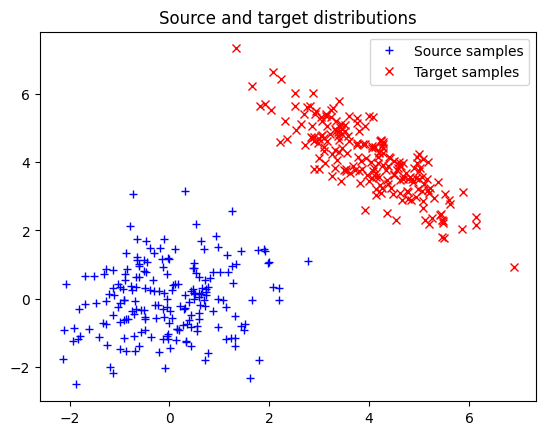

In [80]:
pl.figure(1)
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target distributions')

In [101]:
n_seed = 20
n_projections_arr = np.logspace(0, 3, 10, dtype=int)
res = np.empty((n_seed, 10))

for seed in range(n_seed):
    for i, n_projections in enumerate(n_projections_arr):
        res[seed, i] = ot.sliced_wasserstein_distance(xs, xt, a, b, n_projections, seed=seed)

res_mean = np.mean(np.mean(res, axis=0))

print('Sliced wasserstein distance between source and target :', res_mean)

Sliced wasserstein distance between source and target : 3.973608898026727


**Wasserstein distance**

In [100]:
M = ot.dist(xs, xt, metric = 'euclidean')
# Résoudre le problème de transport optimal
wasserstein_distance = (ot.emd2(a, b, M))

print("Wasserstein Distance:", wasserstein_distance)

Wasserstein Distance: 5.750809103125897
